In [48]:
import seaborn
import numpy as np
import pandas as pd
import ranking as r
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 199249 observations with 27165 users and 64 items.
PROGRESS:     Data prepared in: 0.098876s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations            

In [49]:
athlete_ratings, segment_ratings, models = cm.df_to_latent_features(training_df)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 199249 observations with 27165 users and 64 items.
PROGRESS:     Data prepared in: 0.102112s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations            

In [50]:
vm.testing_rmse(models, training_df)

{'downhill': 0.34279379283653039,
 'total': 0.27775767779593646,
 'uphill': 0.18003219253954286}

In [51]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

,total_rating,uphill_rating,downhill_rating
seg_average_grade,0.791466,0.121261,-0.139328
seg_distance,0.181373,-0.282063,-0.111955
seg_maximum_grade,0.178841,0.081863,-0.018174
total_rating,1.000000,-0.480743,-0.789024
uphill_rating,-0.480743,1.000000,NaN
downhill_rating,-0.789024,NaN,1.000000


In [61]:
lb = r.Leaderboards(training_df[['athlete_id', 'segment_id', 'seg_average_grade', 'average_speed']])
lb.store('athlete', athlete_ratings)

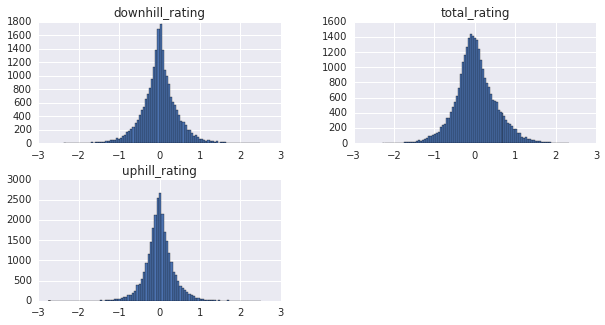

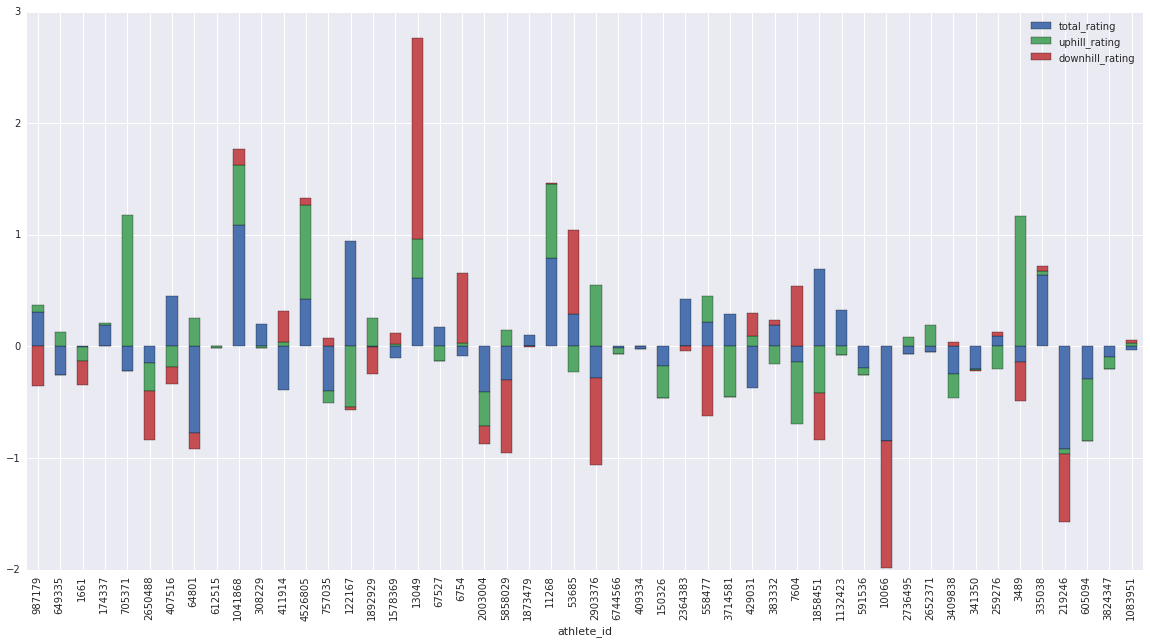

In [53]:
vm.plot_ratings(athlete_ratings)

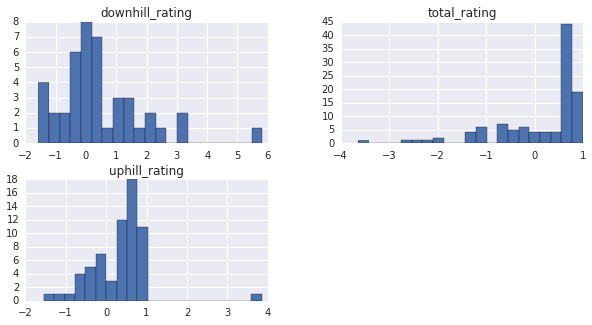

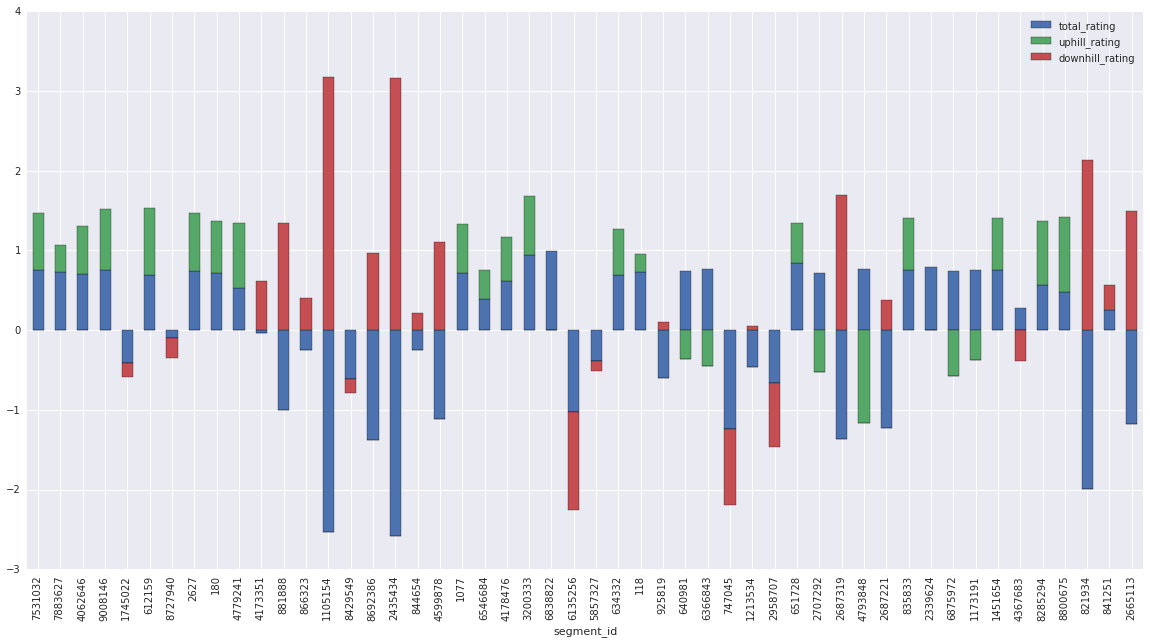

In [54]:
vm.plot_ratings(segment_ratings)